In [1]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [2]:
!pip install ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 7.6 MB/s 


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor
import math

In [4]:
df = pd.read_csv("/content/country_wise_latest.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [6]:
df.isnull().mean()*100

Country/Region            0.0
Confirmed                 0.0
Deaths                    0.0
Recovered                 0.0
Active                    0.0
New cases                 0.0
New deaths                0.0
New recovered             0.0
Deaths / 100 Cases        0.0
Recovered / 100 Cases     0.0
Deaths / 100 Recovered    0.0
Confirmed last week       0.0
1 week change             0.0
1 week % increase         0.0
WHO Region                0.0
dtype: float64

In [7]:
y1= df.pop("Country/Region")
y= df.pop("WHO Region")
X= df

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [19]:
print(y)

[2 3 0 3 0 1 1 3 5 3 3 1 2 4 1 3 3 1 0 4 1 3 0 1 5 3 0 4 0 0 5 0 1 0 0 1 5
 1 0 0 0 1 0 3 1 3 3 3 2 1 1 1 2 1 0 0 3 0 0 5 3 3 0 0 3 3 0 3 3 1 1 0 0 1
 1 3 1 3 3 4 4 2 2 3 3 3 1 5 2 3 0 3 2 3 5 3 2 0 0 2 3 3 3 0 0 5 4 0 3 0 0
 1 3 3 5 3 2 0 0 4 3 5 1 0 0 3 3 2 2 1 5 1 1 5 3 3 2 3 3 0 1 1 1 3 0 2 0 3
 0 0 5 3 3 2 0 5 0 3 4 2 1 3 3 2 5 3 0 4 4 0 1 2 3 1 0 3 2 3 1 3 1 5 2 0 2
 0 0]


In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state= 42)

In [10]:
categoricalcolumns = X.select_dtypes(include=["object"]).columns.tolist()

In [12]:
cat_features = [X.columns.get_loc(col) for col in categoricalcolumns]
print("Location of categorical columns : ",cat_features)

Location of categorical columns :  []


In [13]:
# importing Pool
from catboost import Pool
#Creating pool object for train dataset. we give information of categorical fetures to parameter cat_fetaures
train_data = Pool(data=X_train,
                  label=y_train,
                  cat_features=cat_features
                 )
#Creating pool object for test dataset
test_data = Pool(data=X_test,
                  label=y_test,
                  cat_features=cat_features
                 )

In [20]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier()

In [21]:
#build model
#cat_model = CatBoost()
# Fit model 
clf.fit( X_train, y_train,
               eval_set=(X_test, y_test),
               plot=True
              )


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.103942
0:	learn: 1.7476568	test: 1.7601078	best: 1.7601078 (0)	total: 56.7ms	remaining: 56.7s
1:	learn: 1.7177913	test: 1.7381363	best: 1.7381363 (1)	total: 65.3ms	remaining: 32.6s
2:	learn: 1.6846062	test: 1.7189085	best: 1.7189085 (2)	total: 72.9ms	remaining: 24.2s
3:	learn: 1.6544265	test: 1.7028642	best: 1.7028642 (3)	total: 80.2ms	remaining: 20s
4:	learn: 1.6256759	test: 1.6776005	best: 1.6776005 (4)	total: 88ms	remaining: 17.5s
5:	learn: 1.5984701	test: 1.6673925	best: 1.6673925 (5)	total: 95.5ms	remaining: 15.8s
6:	learn: 1.5710995	test: 1.6560654	best: 1.6560654 (6)	total: 103ms	remaining: 14.7s
7:	learn: 1.5455858	test: 1.6343996	best: 1.6343996 (7)	total: 111ms	remaining: 13.8s
8:	learn: 1.5243481	test: 1.6100335	best: 1.6100335 (8)	total: 119ms	remaining: 13.1s
9:	learn: 1.5000511	test: 1.5971806	best: 1.5971806 (9)	total: 126ms	remaining: 12.5s
10:	learn: 1.4822236	test: 1.5874813	best: 1.5874813 (10)	total: 134ms	remaining: 12s
11:	learn: 1.4579891	t

Text(0.5, 1.0, 'features importance')

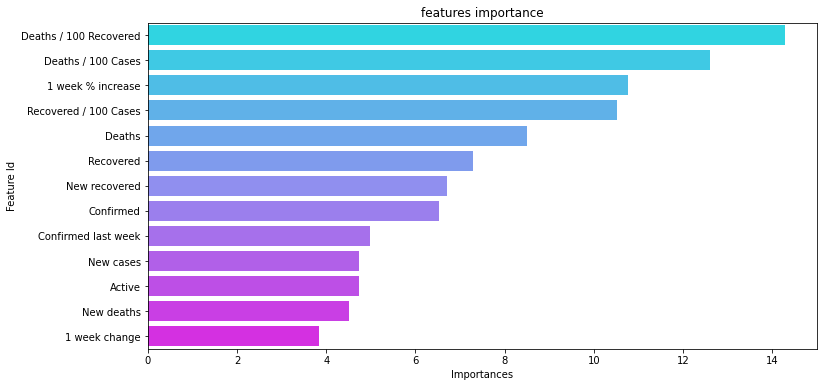

In [22]:
df_feature_importance = pd.DataFrame(clf.get_feature_importance(prettified=True))
#plotting feature importance
plt.figure(figsize=(12, 6));
feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance,palette="cool");
plt.title('features importance')